In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


Exploratory Data Analysis

In [333]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.drop(['ID'], axis=1, inplace=True)
df


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [334]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [335]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [336]:
df.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<AxesSubplot: >

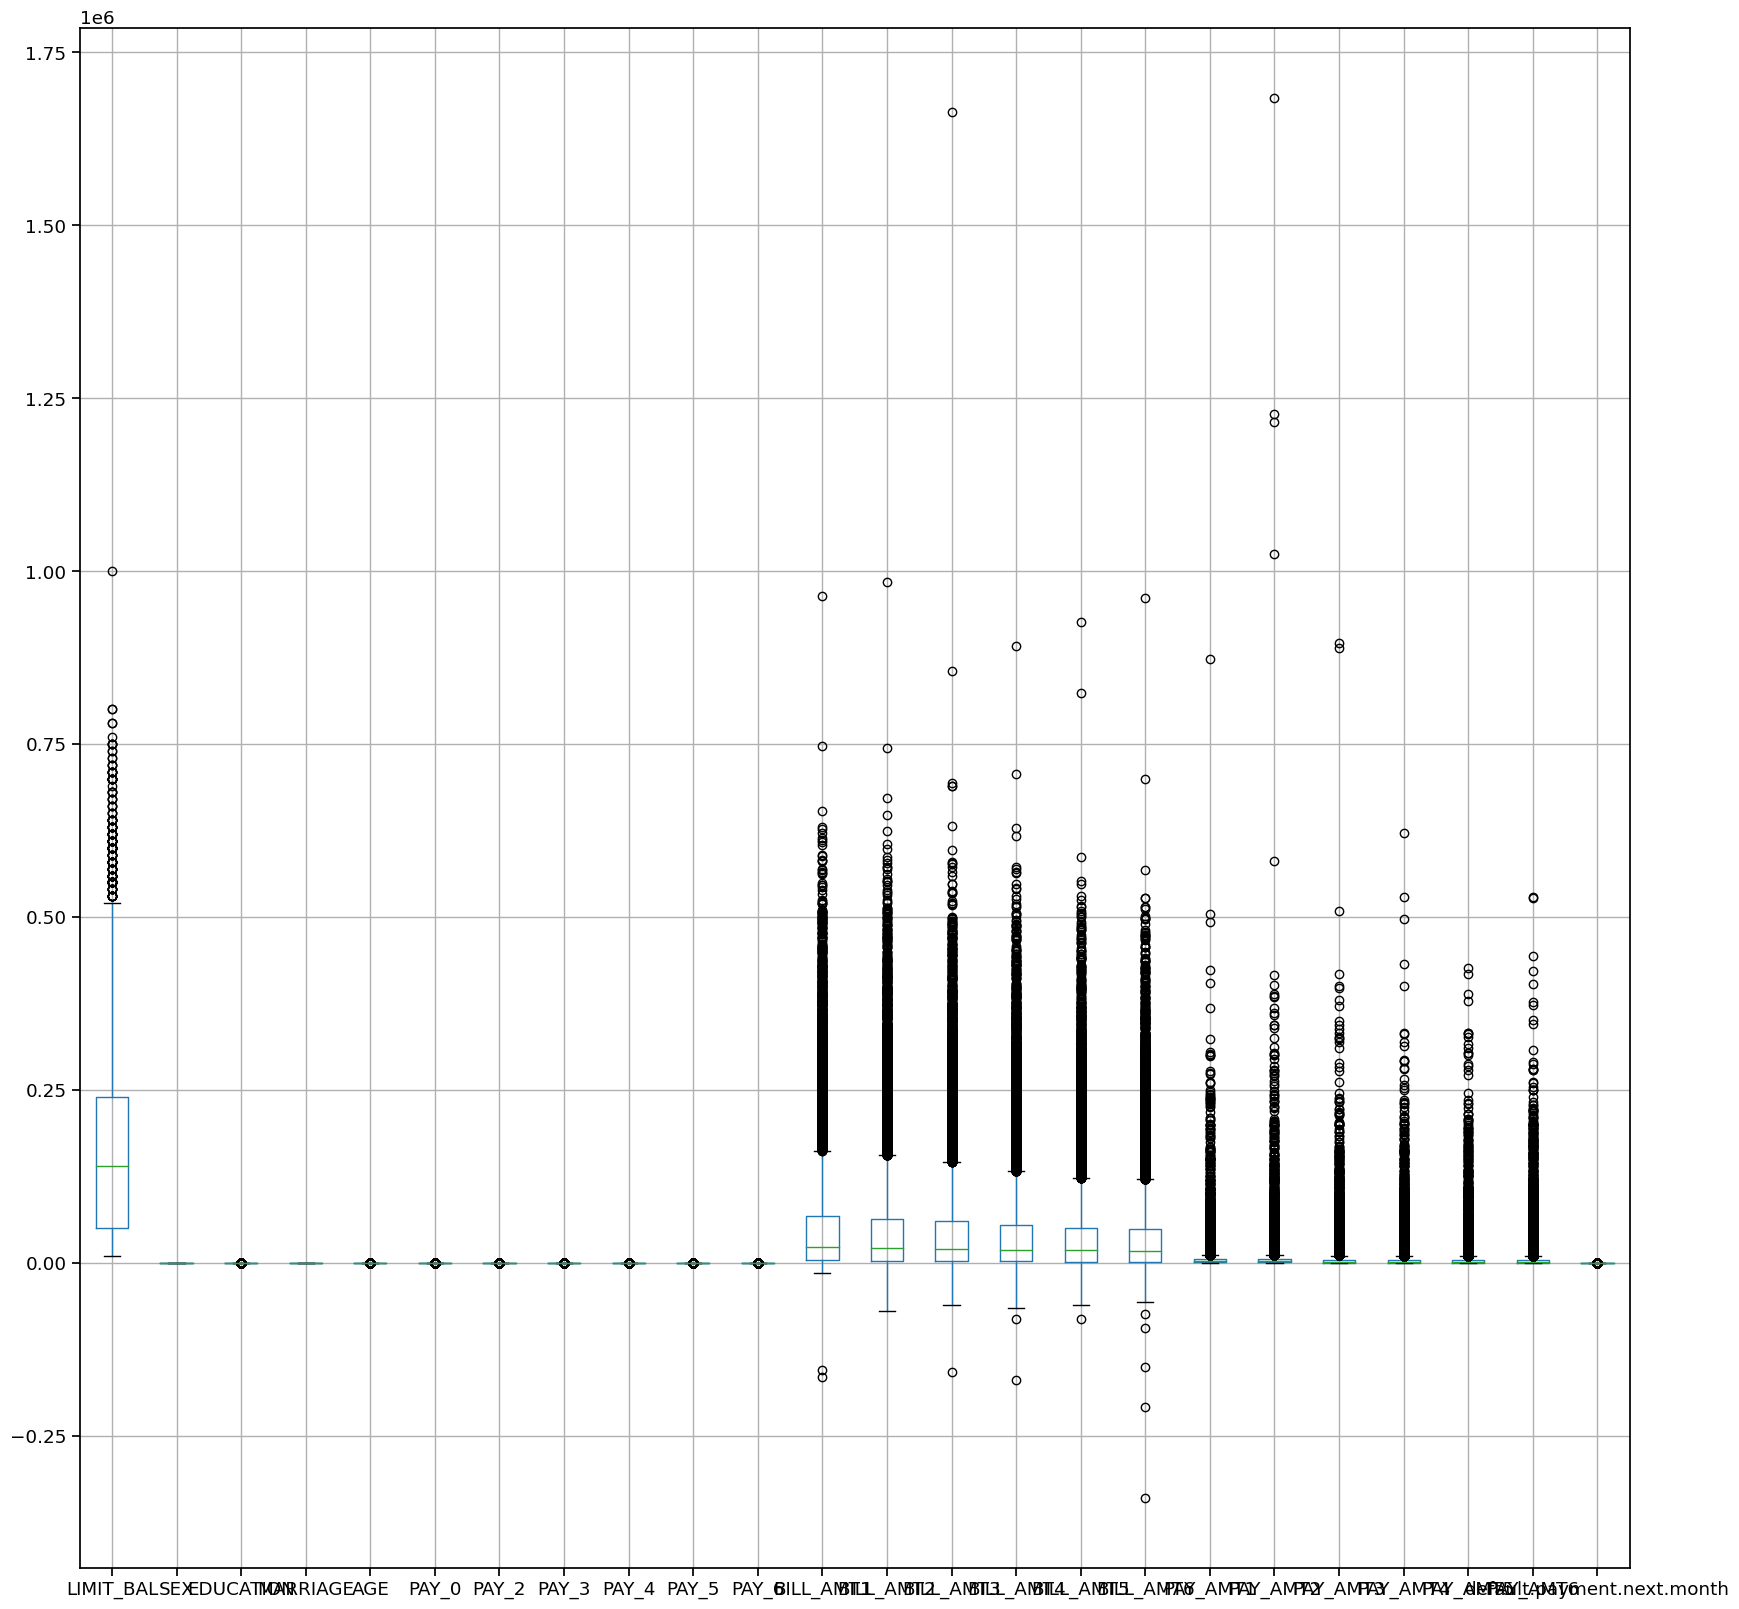

In [337]:
plt.figure(figsize=(20, 20))
df.boxplot()


In [338]:
# outlier removal
# import pandas as pd
# import numpy as np

# # Define the columns to check for outliers
# columns_to_check = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#                     'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# # Calculate the IQR for each column
# Q1 = df[columns_to_check].quantile(0.25)
# Q3 = df[columns_to_check].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper and lower bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove the outliers from the dfset
# df = df[~((df[columns_to_check] < lower_bound) | (
#     df[columns_to_check] > upper_bound)).any(axis=1)]

# # Print the new shape of the dfset
# print("New shape of the dfset after removing outliers:", df.shape)


In [339]:
# plt.figure(figsize=(20, 20))
# df.boxplot()


<AxesSubplot: >

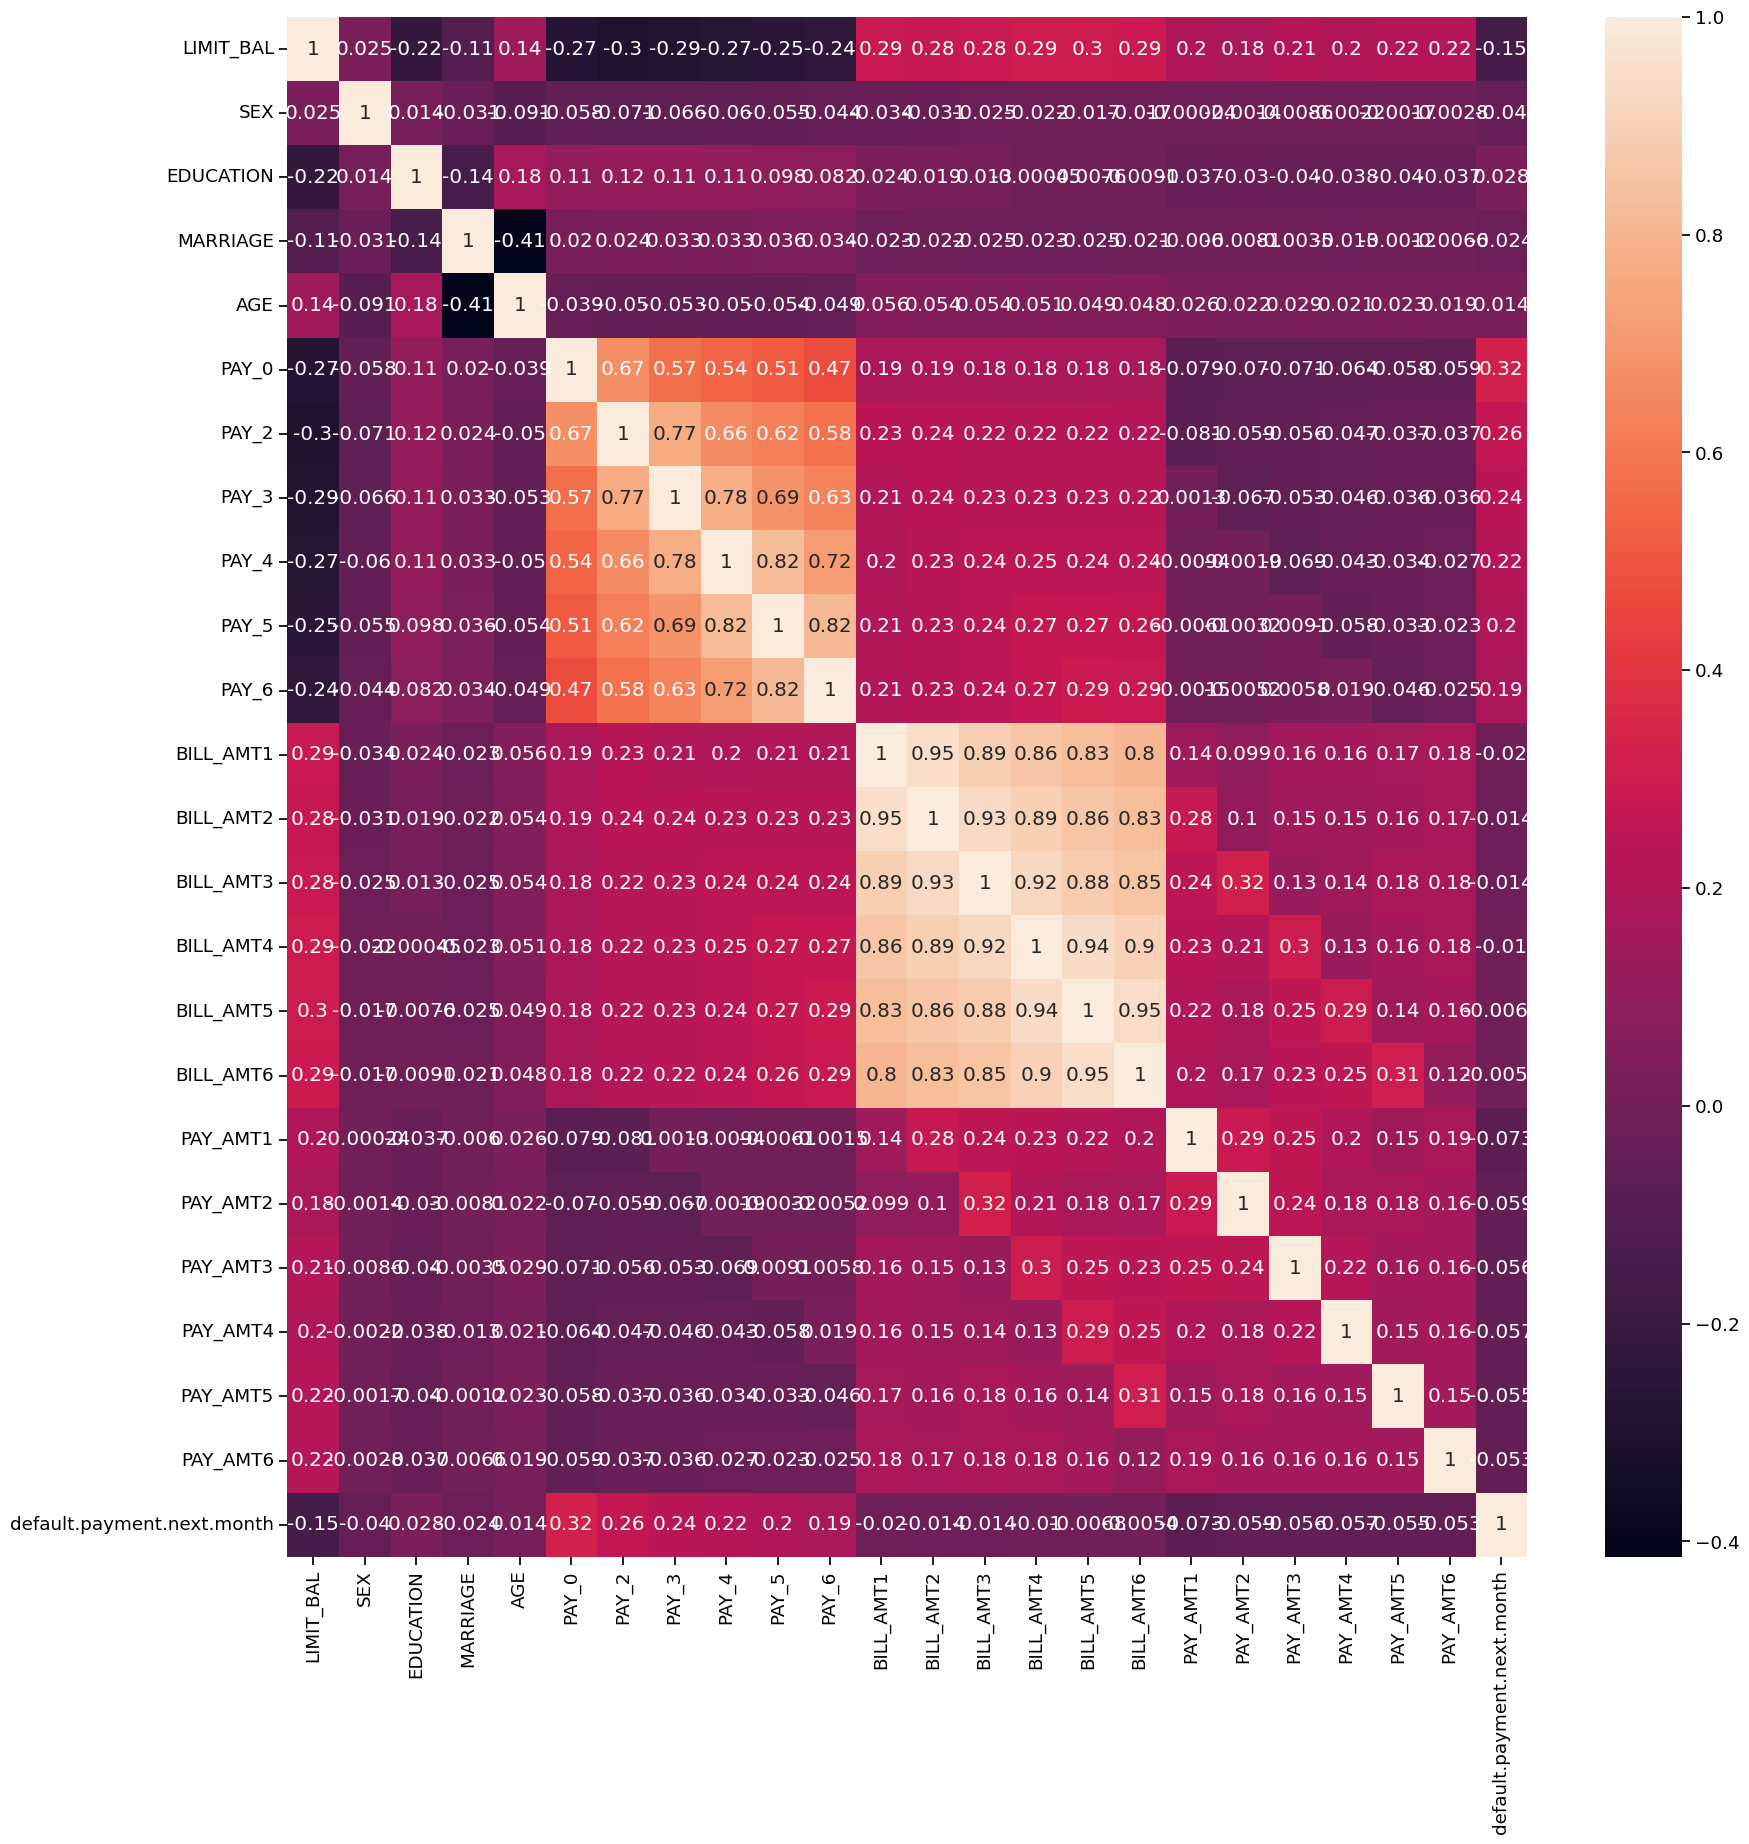

In [340]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)


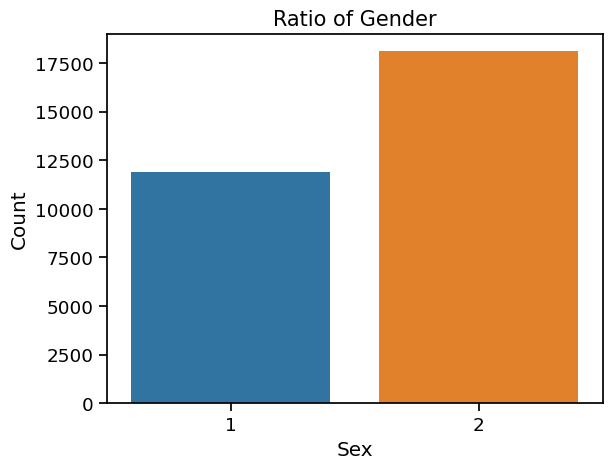

In [341]:
plt.figure(dpi=100)
df.SEX.value_counts()
sns.countplot(x="SEX", data=df)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


In [342]:
df = df.rename(columns={'default.payment.next.month': 'Default'})


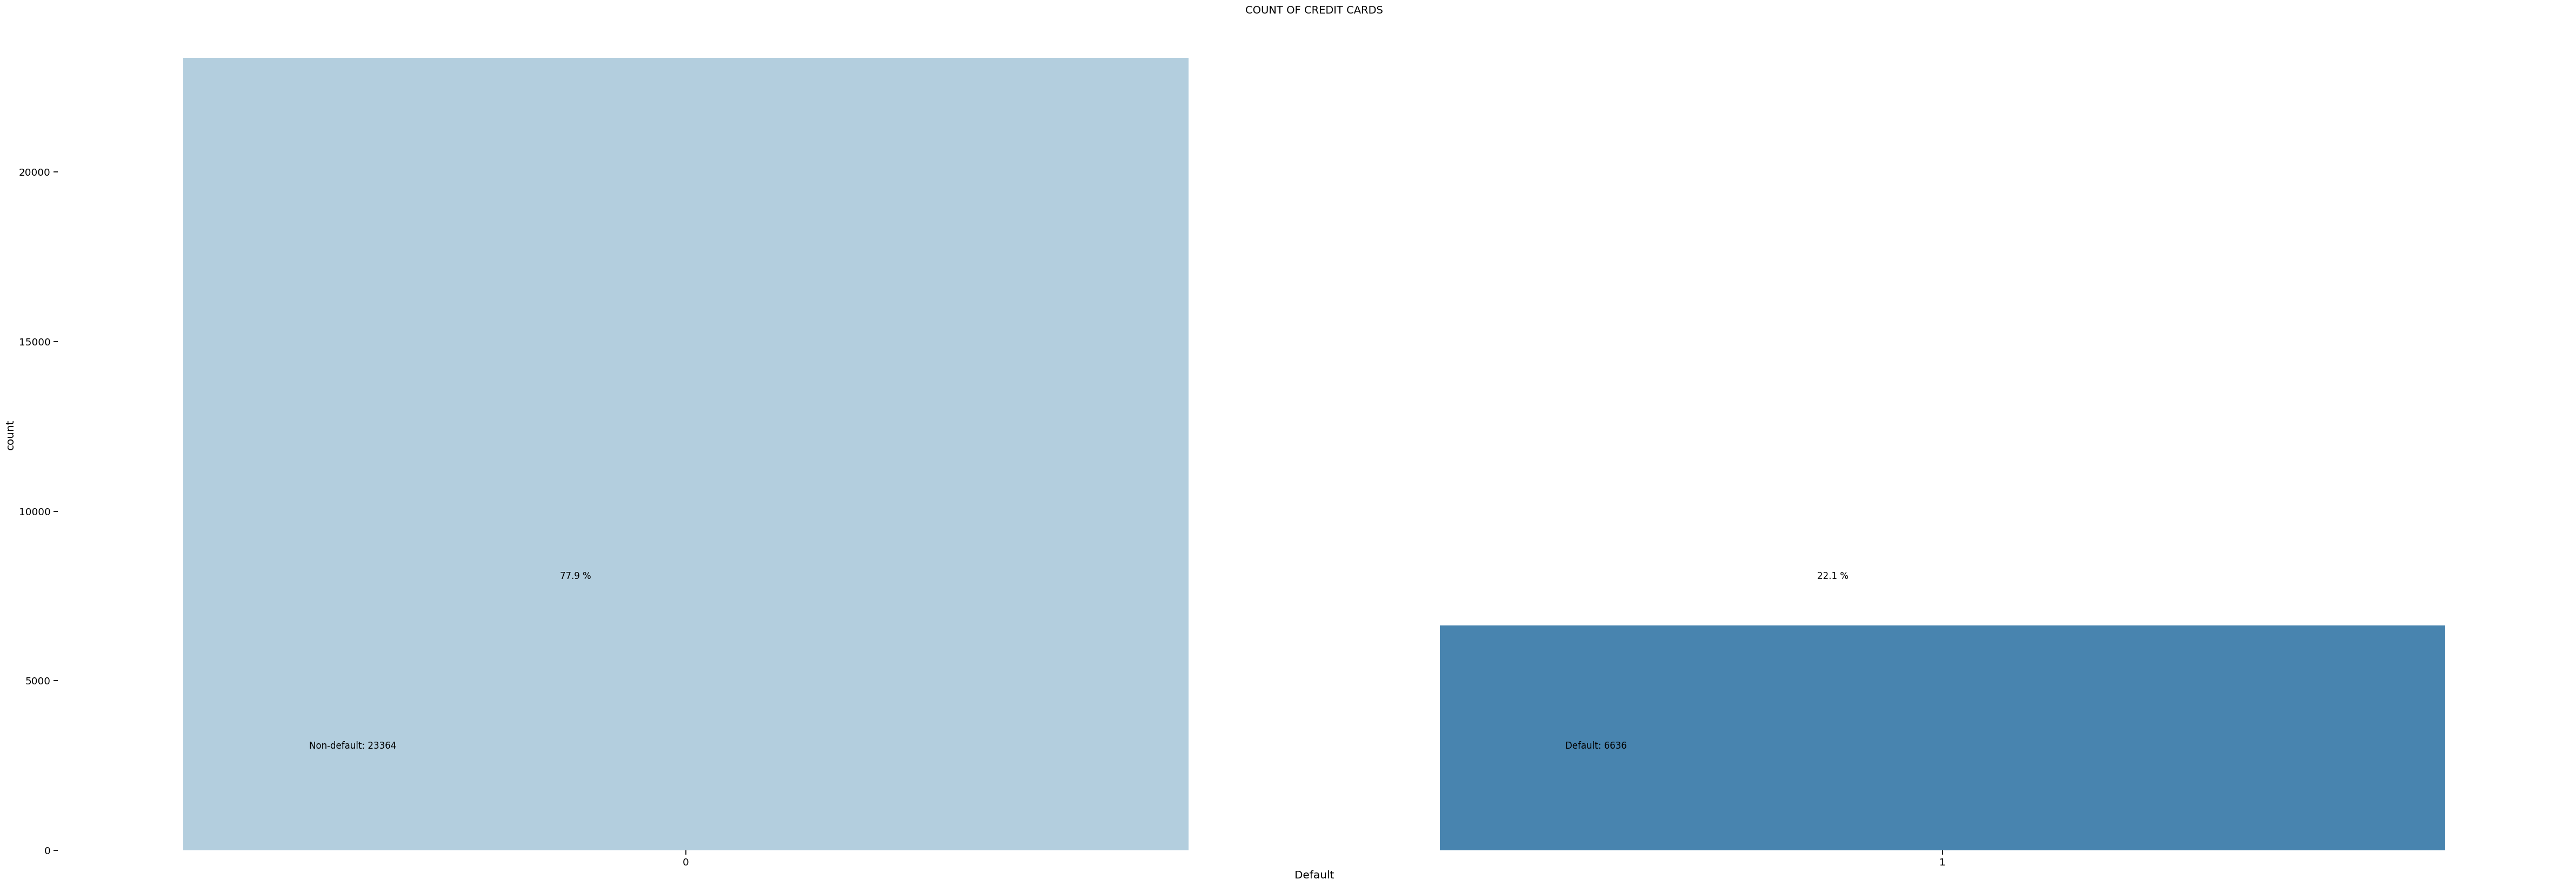

In [343]:
yes = df['Default'].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

plt.figure(figsize=(60, 20))
sns.set_context('notebook', font_scale=1.2)
# Removed 'Default' argument
sns.countplot(x=df['Default'], data=df, palette="Blues")
# sns.countplot('', df, '')
# sns.countplot('Default',data=df, palette="Blues")

plt.annotate('Non-default: {}'.format(no),
             xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(
    0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
# Removing the frame

plt.box(False)


<AxesSubplot: xlabel='Default', ylabel='count'>

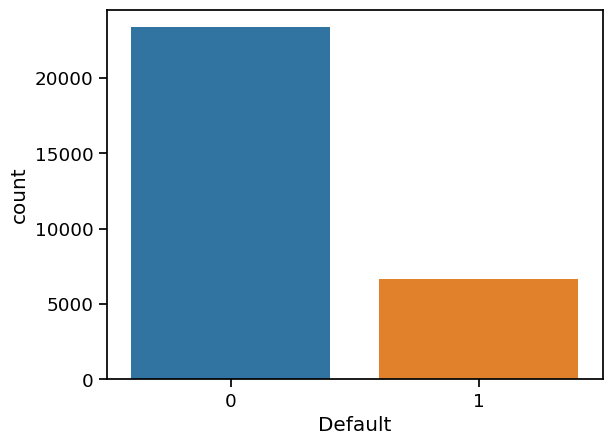

In [344]:
import seaborn as sns

sns.countplot(x='Default', data=df)


In [345]:
from imblearn.over_sampling import SMOTE


X = df.drop('Default', axis=1)
y = df['Default']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


<AxesSubplot: xlabel='Default', ylabel='count'>

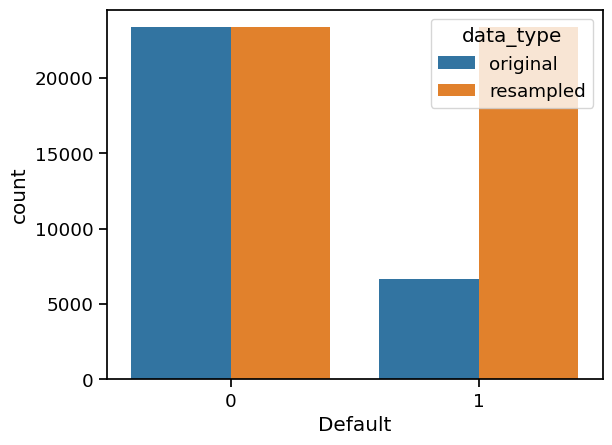

In [346]:
import seaborn as sns

original_data = pd.DataFrame({'Default': y})
original_data['data_type'] = 'original'

resampled_data = pd.DataFrame({'Default': y_res})
resampled_data['data_type'] = 'resampled'

concatenated_data = pd.concat([original_data, resampled_data])

sns.countplot(x='Default', hue='data_type', data=concatenated_data)


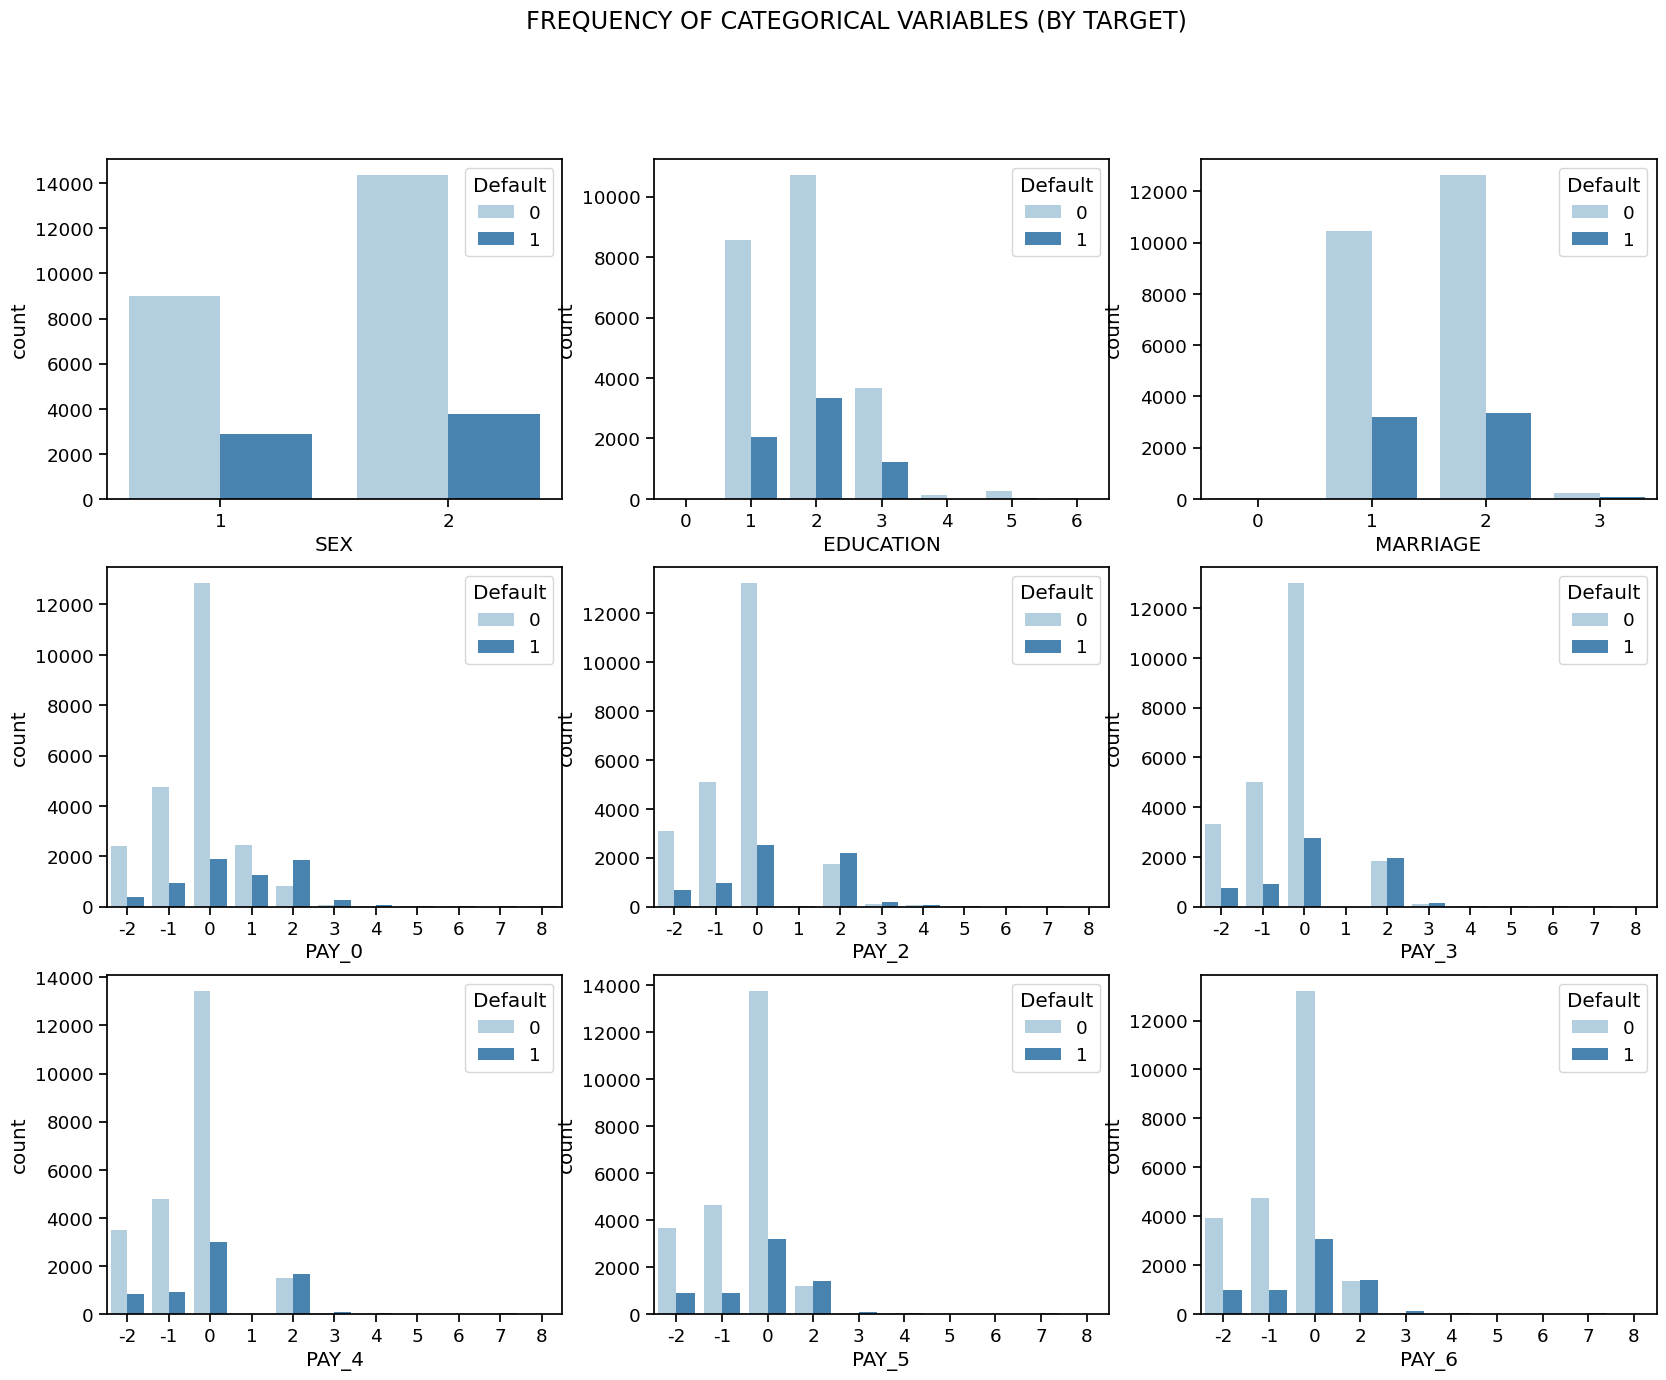

In [347]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset,
                    palette="Blues", ax=axes[0, 0])
ax2 = sns.countplot(x="EDUCATION", hue="Default",
                    data=subset, palette="Blues", ax=axes[0, 1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default",
                    data=subset, palette="Blues", ax=axes[0, 2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset,
                    palette="Blues", ax=axes[1, 0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset,
                    palette="Blues", ax=axes[1, 1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset,
                    palette="Blues", ax=axes[1, 2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset,
                    palette="Blues", ax=axes[2, 0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset,
                    palette="Blues", ax=axes[2, 1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset,
                    palette="Blues", ax=axes[2, 2])


Uncorrelated data are poentially more useful: discrimentory!


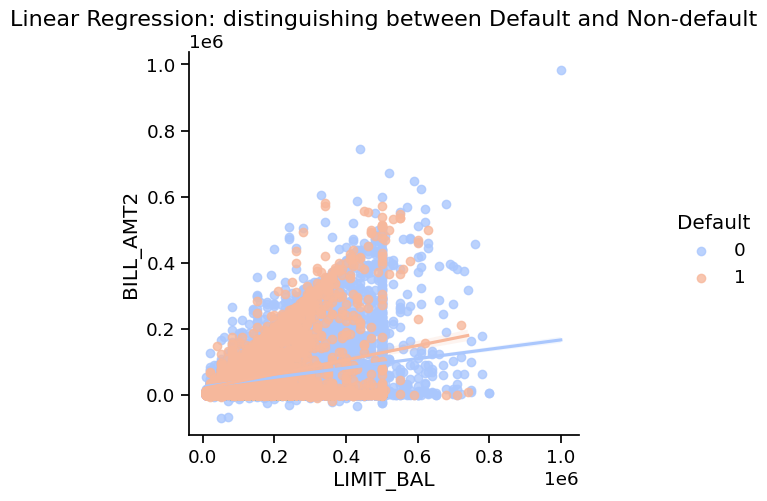

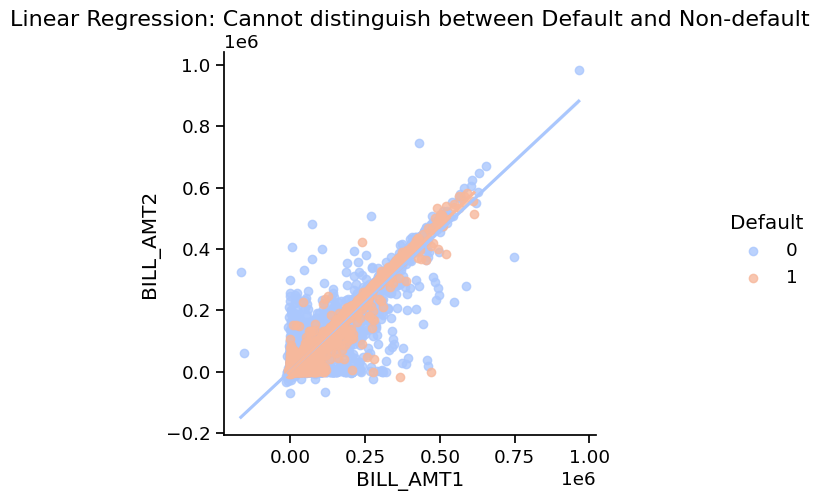

In [348]:
sns.lmplot(x='LIMIT_BAL', y='BILL_AMT2', data=df,
           hue='Default', palette='coolwarm')
plt.title(
    'Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y='BILL_AMT2', data=df,
           hue='Default', palette='coolwarm')
plt.title(
    'Linear Regression: Cannot distinguish between Default and Non-default', size=16)

print('Uncorrelated data are poentially more useful: discrimentory!')


# Feature Selection

In [350]:
X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
features = df.drop('Default', axis=1, inplace=False)


In [ ]:
stdX = (features - features.mean()) / (features.std())


In [ ]:
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(
    stdX, y, test_size=0.4, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
NUM_FEATURES = 3
model = LogisticRegression()
rfe_stand = RFE(model)
fit_stand = rfe_stand.fit(stdX, y)
# print("St Model Num Features:", fit_stand.n_features_)
# print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX, y)
print("Standardized Model Score with selected features is: %f (%f)" %
      (score_stand.mean(), score_stand.std()))


Std Model Feature Ranking: [ 1  7  1  1  2  1  1  1 10  3 13  1  1  1 12  5 11  1  1  6  4  8  9]
Standardized Model Score with selected features is: 0.810133 (0.000000)


In [ ]:
feature_names = np.array(features.columns)
print('Most important features (RFE): %s' % feature_names[rfe_stand.support_])


Most important features (RFE): ['LIMIT_BAL' 'EDUCATION' 'MARRIAGE' 'PAY_0' 'PAY_2' 'PAY_3' 'BILL_AMT1'
 'BILL_AMT2' 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2']


In [362]:
Ximp = stdX[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2']]


In [363]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Ximp, y)


In [366]:
X_tr, X_t, y_tr, y_t = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)


Model building

# Logistic Regression

In [367]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_tr, y_tr)
y_pred_lr = lr.predict(X_t)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format (lr.score(X_t, y_t)))


Accuracy of logistic regression classifier on test set: 0.66


In [368]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_lr)
print(confusion_matrix)


[[3213 1451]
 [1698 2984]]


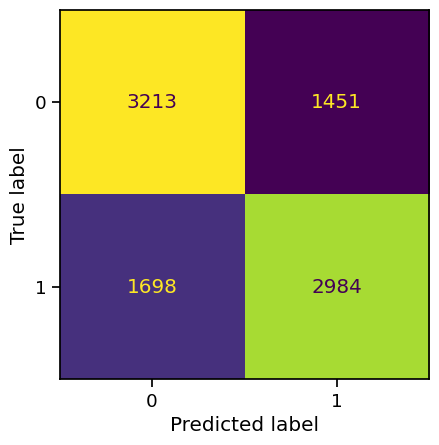

In [369]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_t, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False, )


# Decison Tree

In [370]:
from sklearn.tree import DecisionTreeClassifier


In [371]:
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
y_pred_dt = dt.predict(X_t)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(
    dt.score(X_t, y_t)))


Accuracy of Decision Tree classifier on test set: 0.75


In [372]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_dt)
print(confusion_matrix)


[[3457 1207]
 [1094 3588]]


# Random Forest

In [373]:
from sklearn.ensemble import RandomForestClassifier


In [374]:
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
y_pred_rf = rf.predict(X_t)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_t, y_t)))


Accuracy of Random Forest classifier on test set: 0.82


In [375]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_rf)
print(confusion_matrix)


[[3935  729]
 [ 913 3769]]


In [394]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ", accuracy_score(y_t, y_pred_rf))
print(confusion_matrix(y_t, y_pred_rf))
print("Classification Report:")
print(classification_report(y_t, y_pred_rf))


Accuracy Score:  0.824309865182966
[[3935  729]
 [ 913 3769]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4664
           1       0.84      0.80      0.82      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



# KNN

In [376]:
from sklearn.neighbors import KNeighborsClassifier


In [377]:
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)
y_pred_knn = knn.predict(X_t)
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_t, y_t)))


Accuracy of K-NN classifier on test set: 0.76


In [378]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_knn)
print(confusion_matrix)


[[3211 1453]
 [ 795 3887]]


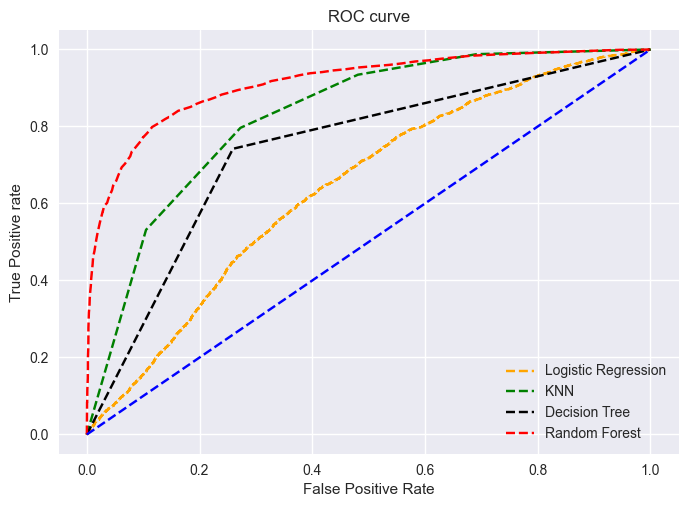

In [396]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=4)
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:, 1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


auc_score1 = roc_auc_score(y_test, pred_prob1[:, 1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:, 1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:, 1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:, 1])


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange',
         label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--', color='black', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--', color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC', dpi=300)
plt.show()


# HYPERPARAMETER TUNING

Decision Tree

In [397]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_estimator_)


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt')


In [398]:
dt_final = DecisionTreeClassifier(
    criterion='entropy', max_depth=20, max_features='sqrt')
dt_final.fit(X_tr, y_tr)
y_pred_dt_final = dt_final.predict(X_t)
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(
    dt_final.score(X_tr, y_tr)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(
    dt_final.score(X_t, y_t)))


Accuracy of Decision Tree classifier on train set: 0.87
Accuracy of Decision Tree classifier on test set: 0.72


In [400]:
from sklearn.metrics import classification_report

print(classification_report(y_t, y_pred_dt_final))


              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4664
           1       0.72      0.72      0.72      4682

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



logistic Regression

In [379]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid=params)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_estimator_)


LogisticRegression(C=0.001, penalty='l1', solver='saga')


In [380]:
lr_final = LogisticRegression(C=0.001, penalty='l1', solver='saga')
lr_final.fit(X_tr, y_tr)
y_pred_lr_final = lr_final.predict(X_t)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr_final.score(X_tr, y_tr)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_final.score(X_t, y_t)))


Accuracy of logistic regression classifier on train set: 0.69
Accuracy of logistic regression classifier on test set: 0.68


In [381]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_lr_final)
print(confusion_matrix)


[[3583 1081]
 [1907 2775]]


KNN

In [382]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 13], 'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=params)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_estimator_)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [383]:
knn_final = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
knn_final.fit(X_tr, y_tr)
y_pred_knn_final = knn_final.predict(X_t)
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn_final.score(X_t, y_t)))


Accuracy of K-NN classifier on test set: 0.78


Random Forest

In [385]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 7, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)


In [390]:
rf_final = RandomForestClassifier(
    max_depth=9, max_leaf_nodes=9, n_estimators=50)
rf_final.fit(X_tr, y_tr)
y_pred_rf_final = rf_final.predict(X_t)
print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rf_final.score(X_tr, y_tr)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_final.score(X_t, y_t)))


Accuracy of Random Forest classifier on train set: 0.71
Accuracy of Random Forest classifier on test set: 0.70


In [389]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_t, y_pred_rf_final)
print(confusion_matrix)


[[3921  743]
 [2007 2675]]


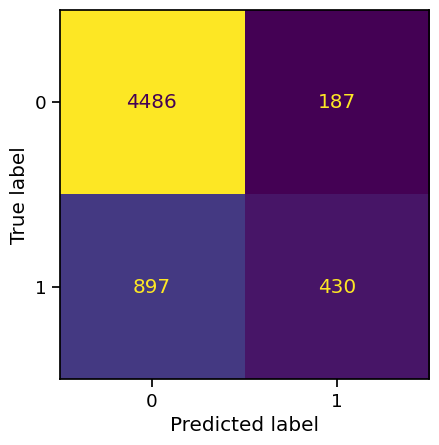

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_t, y_pred_rf_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
clf = AdaBoostClassifier(random_state=96)
clf. fit(X_tr, y_tr)


AdaBoostClassifier(random_state=96)

In [ ]:
clf.score(X_tr, y_tr)


0.81925

In [ ]:
clf.score(X_t, y_t)


0.8163333333333334

In [395]:
import pickle
with open('model.pkl', 'wb') as f:
pickle.dump(rf, f)
